In [1]:
import cv2
import matplotlib as plt
#import the necessary packages
#from pyimagesearch.localbinarypatterns import LocalBinaryPatterns
from sklearn.svm import LinearSVC
from imutils import paths
import statistics
import glob
import argparse
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix
import skimage
from PIL import Image

In [2]:
train_path = next(os.walk('PPA_images/'))[2]
train_ids = sorted(train_path)
# train_ids = train_ids[317:]
# train_ids = ['P0166.jpg','P0200.jpg','P0130.jpg']
print(train_ids)

['H0001.jpg', 'H0002.jpg', 'H0003.jpg', 'H0004.jpg', 'H0005.jpg', 'H0006.jpg', 'H0011.jpg', 'H0012.jpg', 'H0015.jpg', 'H0017.jpg', 'H0018.jpg', 'H0019.jpg', 'H0020.jpg', 'H0021.jpg', 'H0022.jpg', 'H0023.jpg', 'H0026.jpg', 'N0004.jpg', 'N0005.jpg', 'N0006.jpg', 'N0007.jpg', 'N0008.jpg', 'N0009.jpg', 'N0011.jpg', 'N0012.jpg', 'N0018.jpg', 'N0020.jpg', 'N0021.jpg', 'N0023.jpg', 'N0029.jpg', 'N0035.jpg', 'N0038.jpg', 'N0040.jpg', 'N0041.jpg', 'N0044.jpg', 'N0045.jpg', 'N0048.jpg', 'N0049.jpg', 'N0050.jpg', 'N0051.jpg', 'N0054.jpg', 'N0058.jpg', 'N0059.jpg', 'N0062.jpg', 'N0063.jpg', 'N0066.jpg', 'N0067.jpg', 'N0068.jpg', 'N0072.jpg', 'N0073.jpg', 'N0075.jpg', 'N0077.jpg', 'N0078.jpg', 'N0080.jpg', 'N0081.jpg', 'N0086.jpg', 'N0087.jpg', 'N0089.jpg', 'N0090.jpg', 'N0091.jpg', 'N0094.jpg', 'N0095.jpg', 'N0096.jpg', 'N0097.jpg', 'N0100.jpg', 'N0101.jpg', 'N0102.jpg', 'N0103.jpg', 'N0104.jpg', 'N0105.jpg', 'N0106.jpg', 'N0107.jpg', 'N0112.jpg', 'N0114.jpg', 'N0115.jpg', 'N0116.jpg', 'N0117.jpg'

H0001


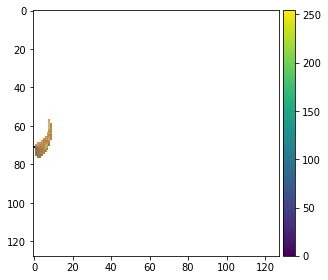

1.6885801248246244
H0002


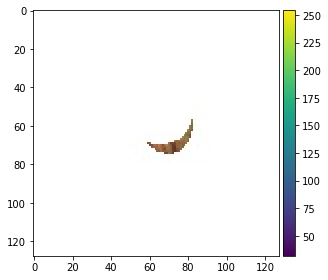

2.959649153046822
H0003


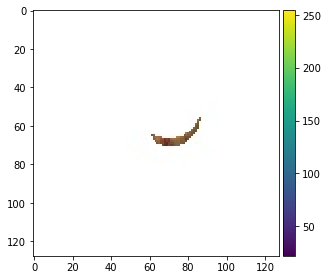

2.7006677626705384
H0004


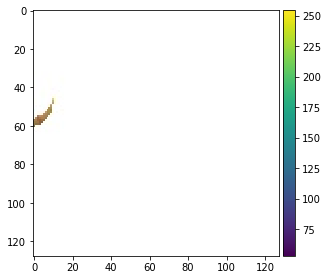

1.6026604931933641
H0005


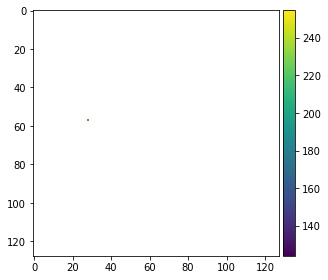

0.34688085665750545
H0006


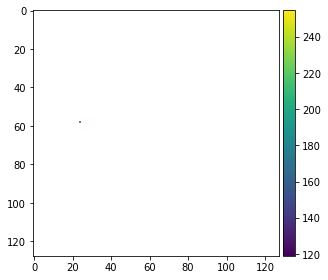

0.350461873657738
H0011


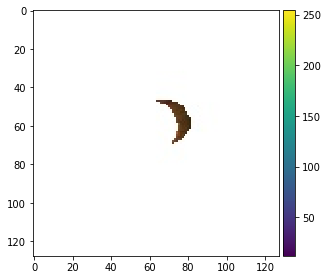

2.934339351405547
H0012


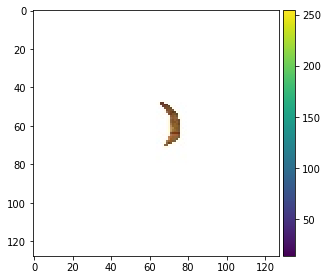

1.9543118536867339
H0015


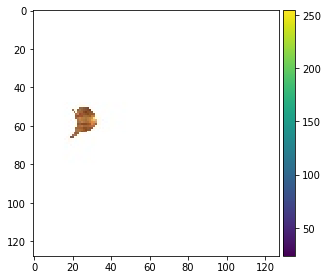

2.4910536041507485
H0017


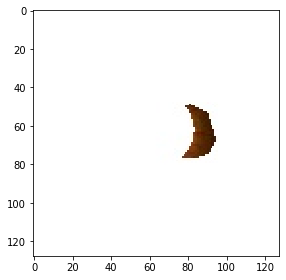

3.2384021791521143
H0018


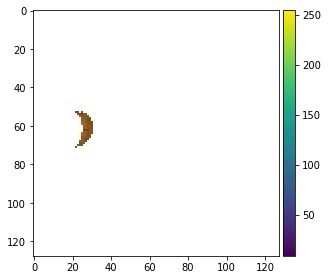

1.9309660884350035
H0019


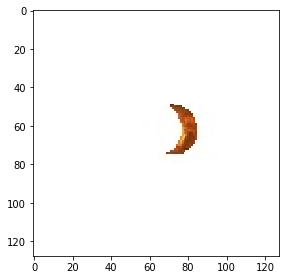

3.540343133985404
H0020


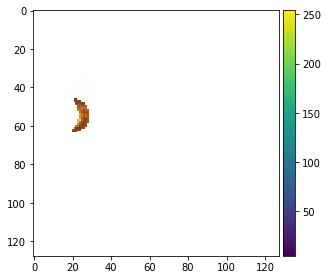

1.8834909179022965
H0021


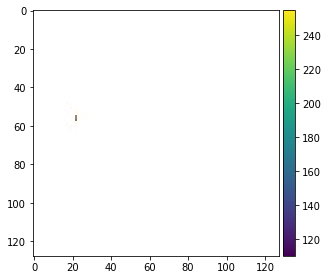

0.6870705898796435
H0022


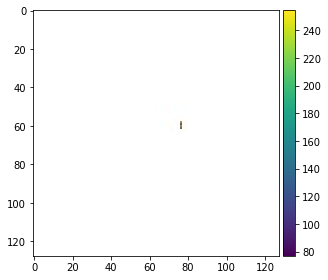

0.7448013326471051
H0023


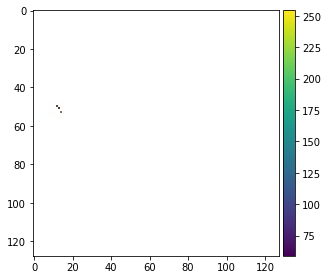

0.5676653627791031
H0026


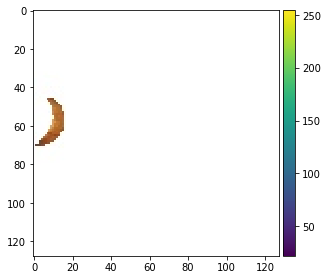

2.6436372817664413
N0004


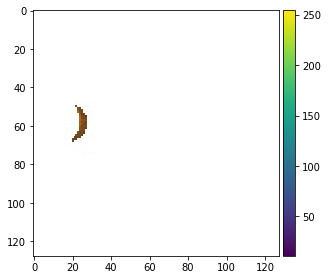

1.800311955957685
N0005


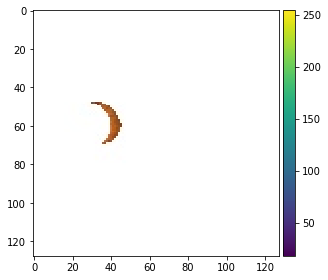

2.3787061349698355
N0006


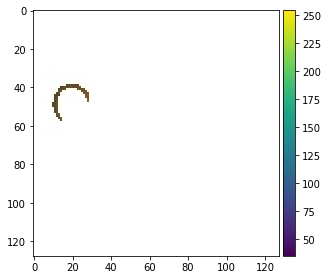

2.3889192046245498
N0007


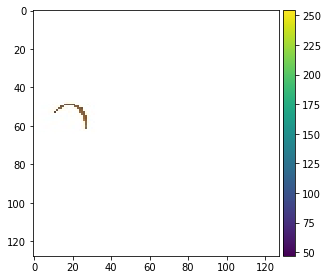

1.6185327346096454
N0008


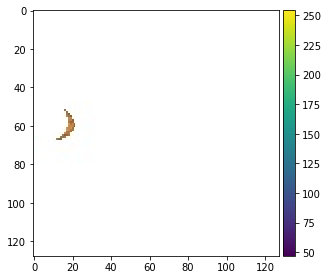

2.025736286783987
N0009


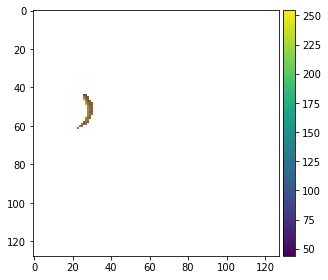

1.7510049112355874
N0011


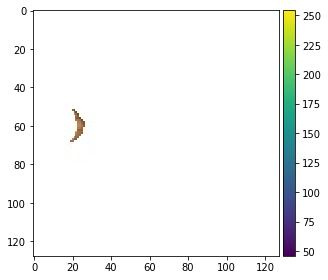

1.7147780909433976
N0012


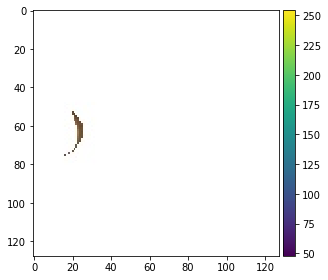

1.8310896060808657
N0018


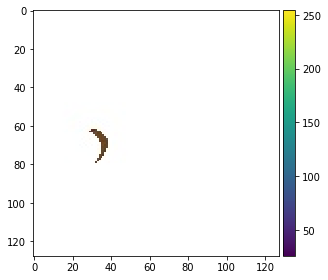

2.1930214740225793
N0020


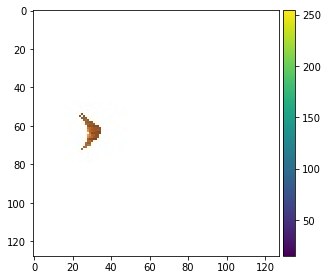

2.6655943963300635
N0021


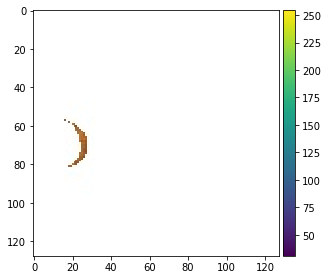

2.316695798641782
N0023


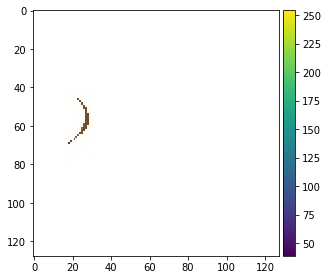

2.0259124397583874
N0029


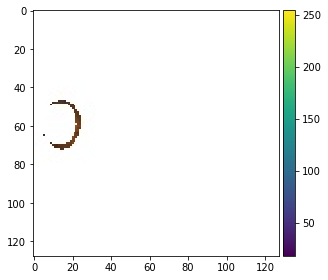

3.165956262106644
N0035


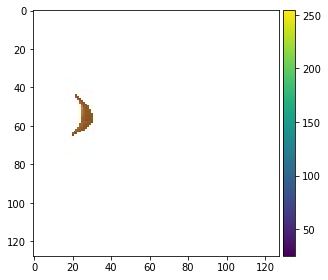

2.267573536980782
N0038


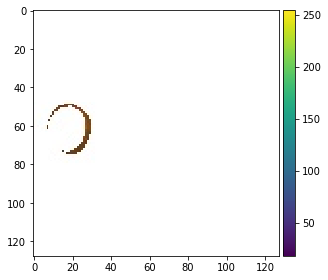

3.0368070883787546
N0040


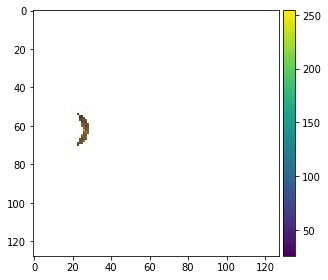

1.6876062417986597
N0041


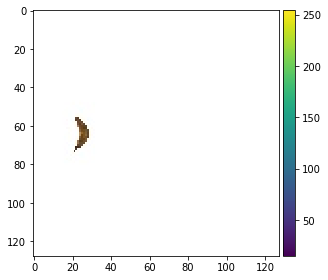

1.743204573939615
N0044


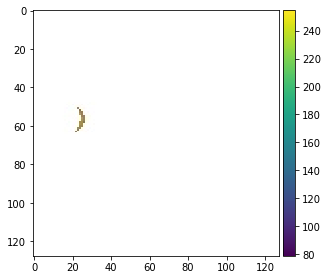

1.1058256650837204
N0045


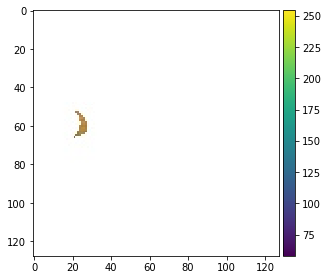

1.728620007917125
N0048


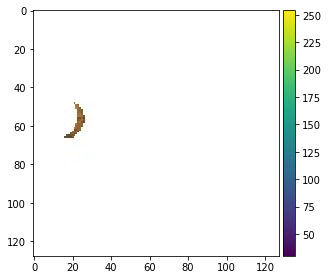

1.836253697630759
N0049


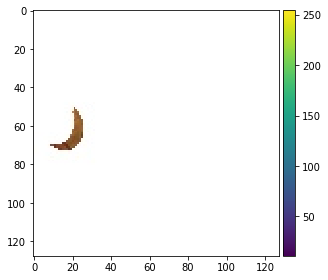

2.586093027073941
N0050


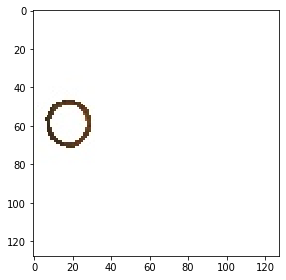

3.7902709849157303
N0051


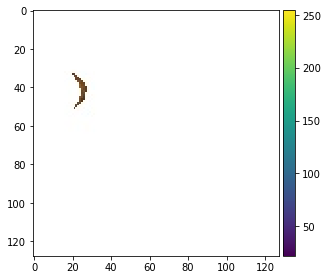

1.6539692825270342
N0054


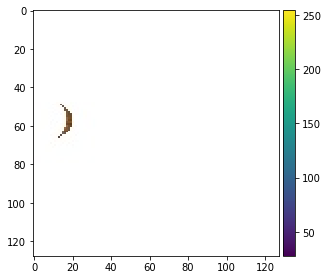

1.9687481293265297
N0058


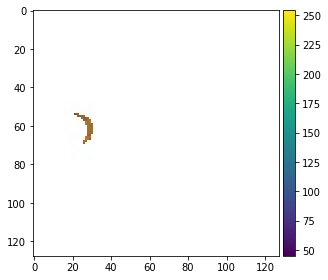

1.6751710527999464
N0059


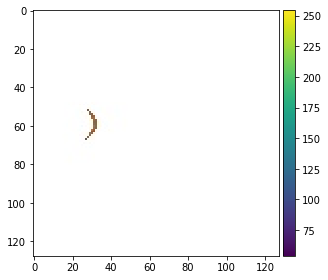

2.0080096143662023
N0062


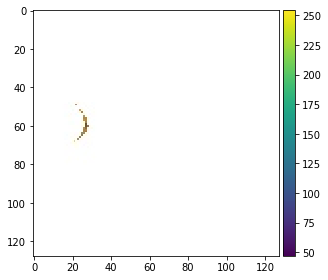

1.6807503806924573
N0063


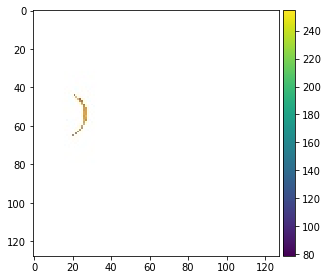

2.1463766597431344
N0066


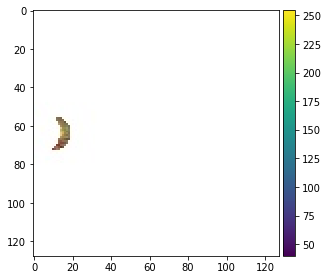

2.572106450687494
N0067


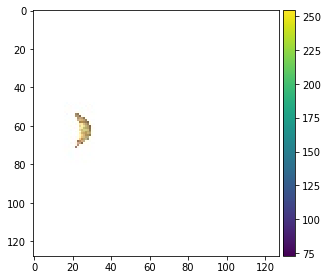

1.864357654020039
N0068


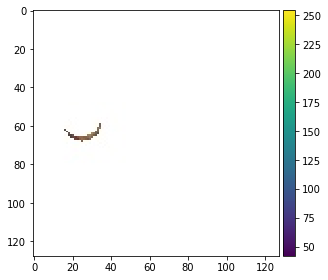

2.0341507827952783
N0072


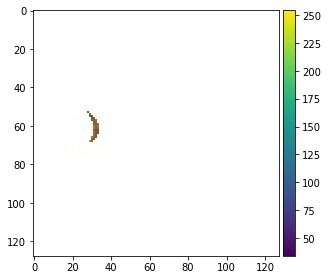

2.4392415684756656
N0073


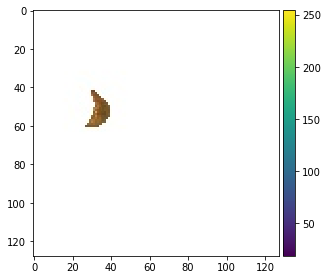

2.8664522870724354
N0075


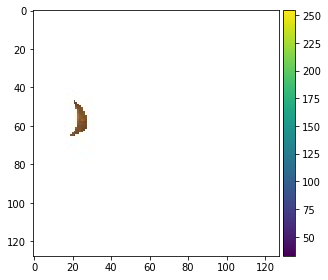

1.9329323502298936
N0077


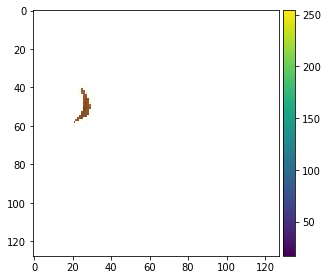

1.7258345518547724
N0078


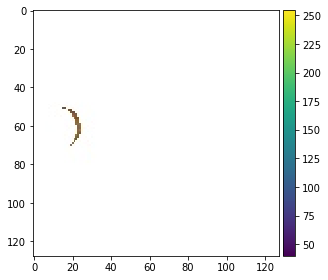

1.8871944822793
N0080


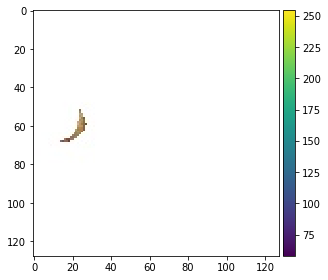

2.0798364049082756
N0081


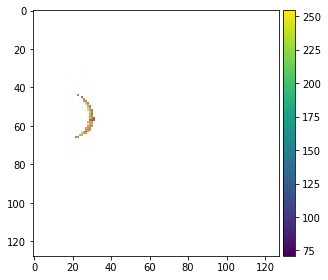

2.3635693336999934
N0086


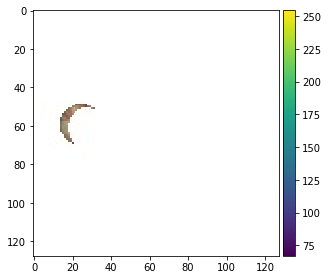

2.364080542929246
N0087


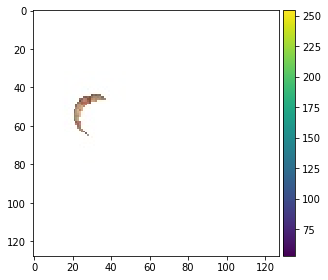

2.352231872710457
N0089


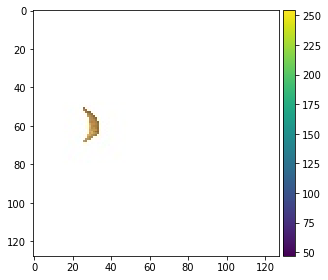

2.6897421344970036
N0090


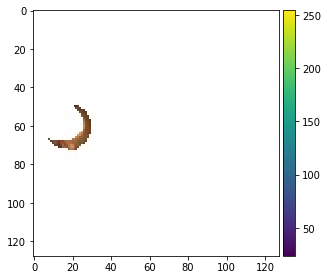

2.6056036950031283
N0091


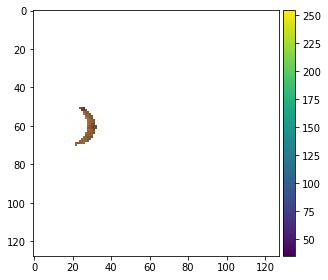

1.9237068480384532
N0094


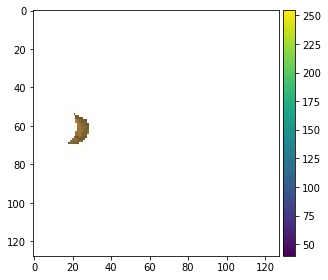

1.8212930712120166
N0095


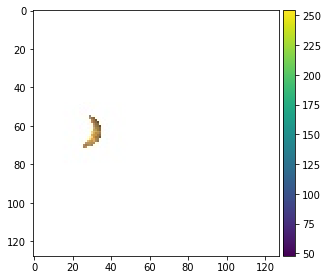

2.59381700778299
N0096


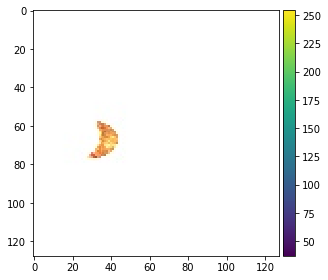

2.781446082901923
N0097


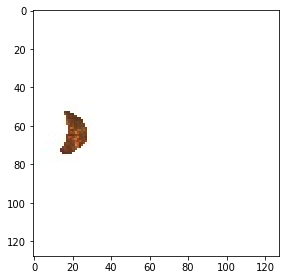

2.7629811700778713
N0100


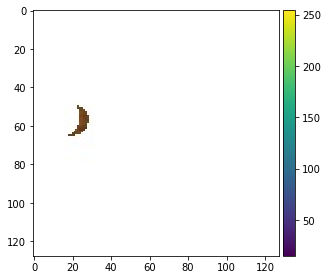

1.8419185001187333
N0101


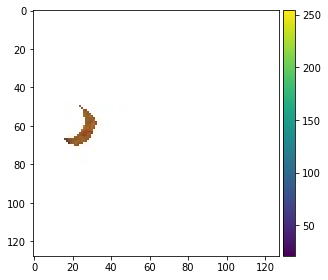

2.4304417684772477
N0102


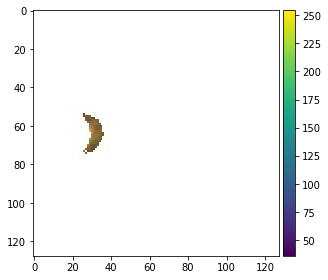

2.8623438110456147
N0103


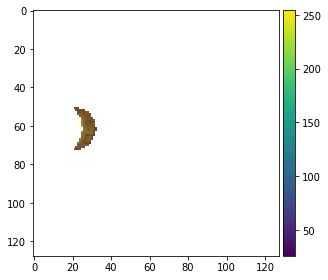

2.4373654274121264
N0104


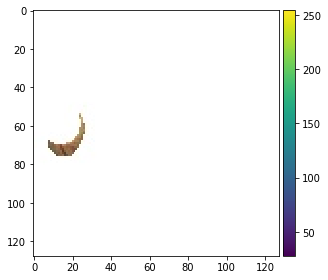

2.504808941875565
N0105


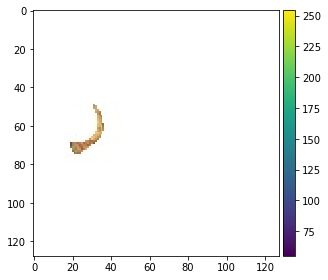

2.959901659335922
N0106


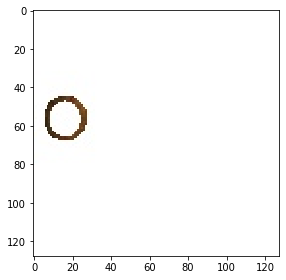

4.11204776282053
N0107


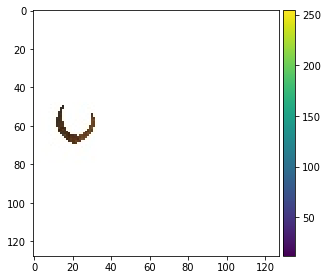

2.7563111390219692
N0112


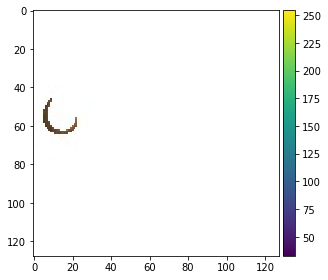

2.7038684564481783
N0114


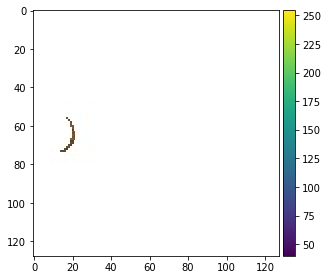

1.764571713489217
N0115


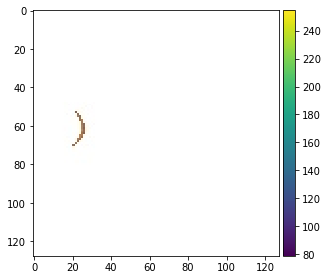

1.6457336755270524
N0116


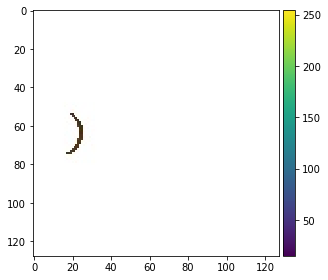

1.77751974978159
N0117


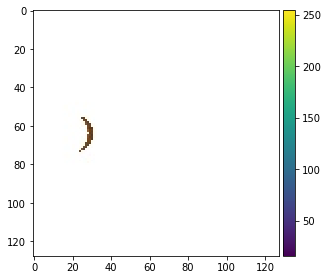

1.6071517223459786
N0118


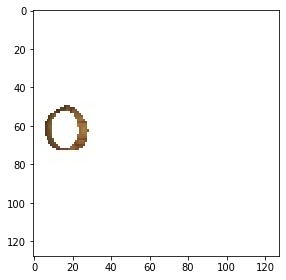

3.6437596778212846
N0119


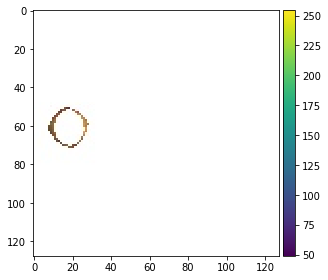

3.02578171558185
N0120


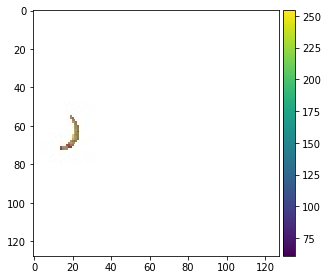

2.2128481623223535
N0121


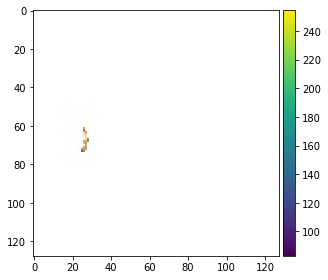

1.4792762308597962
N0131


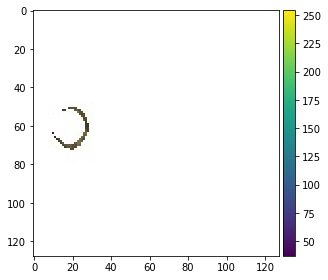

2.3062592209661
N0133


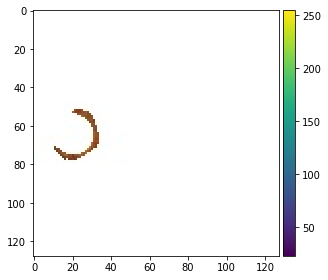

3.62445305565128
N0136


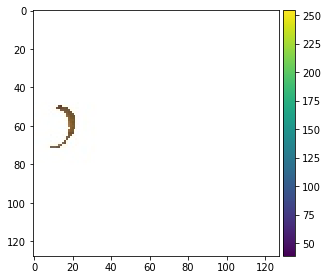

2.4535577430871047
N0138


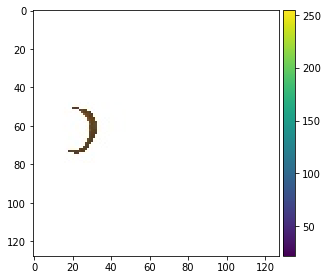

2.5675288139807004
N0139


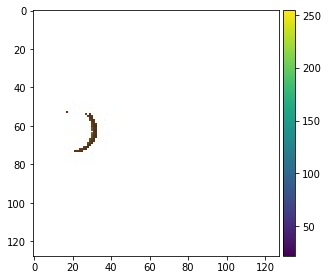

2.394274400731765
N0140


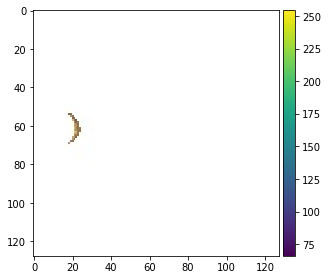

1.6189124154683494
N0141


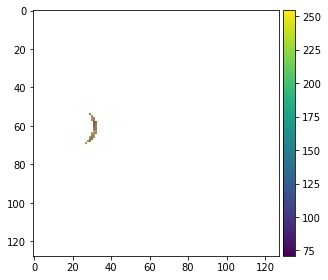

2.187191898036488
N0142


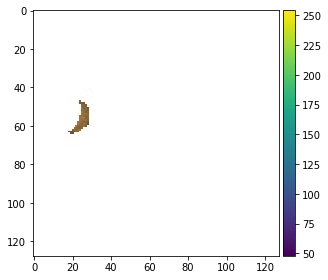

1.6309935996831286
N0143


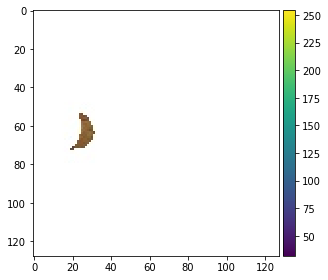

1.9027028067424006
N0144


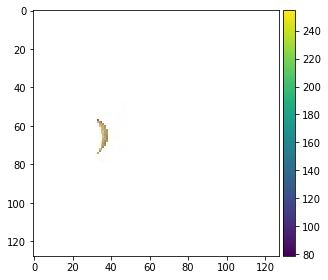

1.68489244200999
N0145


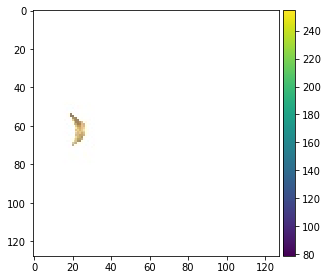

1.8036787456791137
N0146


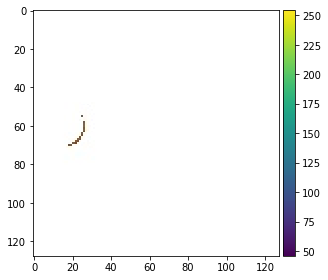

1.5079148673889096
N0150


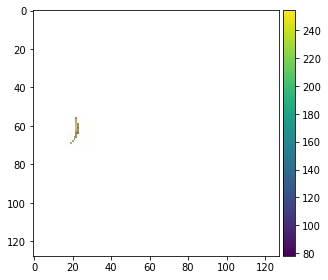

1.3180885692472686
N0151


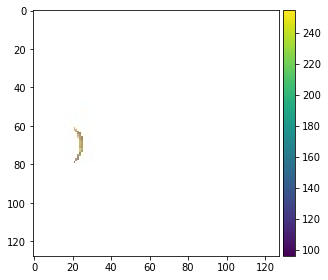

1.5918851180414295
N0152


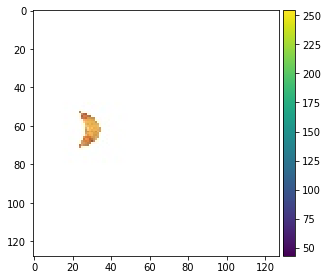

2.827285250901406
N0153


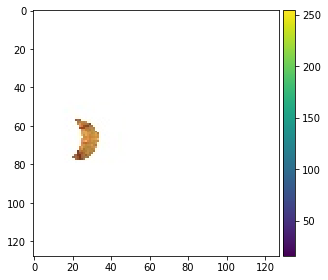

2.925364279115663
N0154


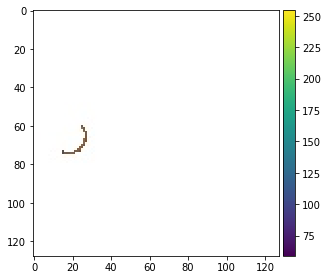

1.8329791329839695
N0155


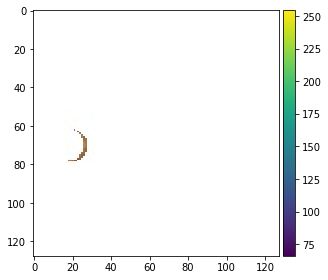

1.4885219765108366
N0156


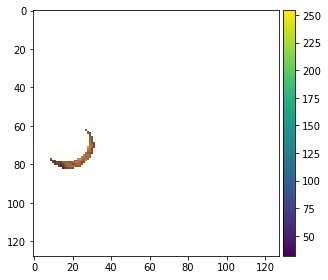

2.9941673971115383
N0159


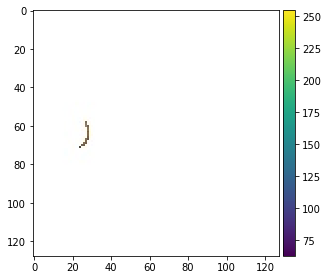

1.39896690872032
P0001


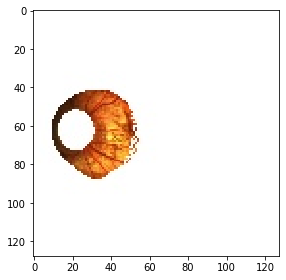

10.753214917182271
P0002


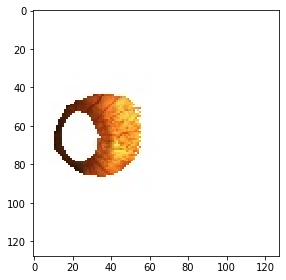

11.287775304074902
P0003


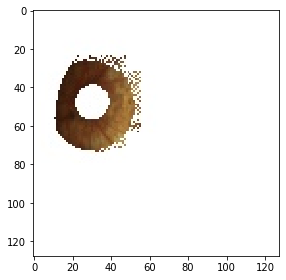

11.314918664608955
P0004


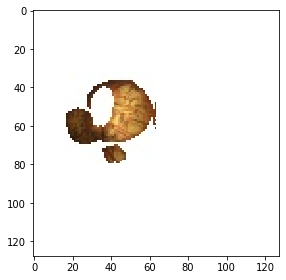

8.667258842379542
P0005


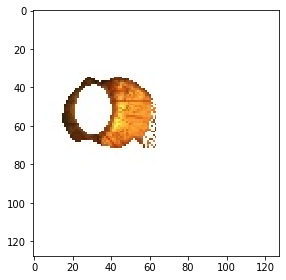

9.404732958408594
P0006


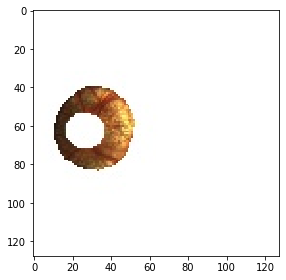

10.002485930451211
P0007


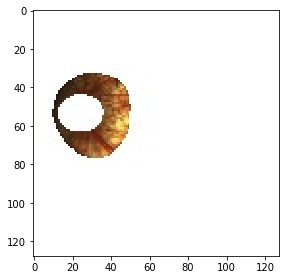

9.412801627682125
P0008


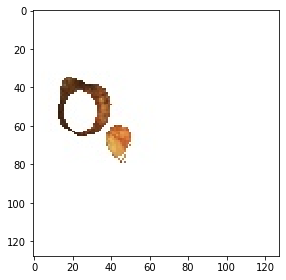

7.579774735060212
P0009


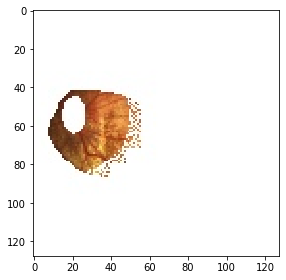

11.603650651603527
P0010


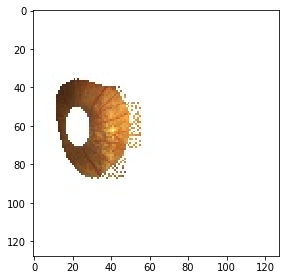

11.700019925842522
P0011


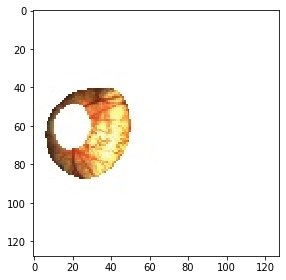

11.281744170350091
P0012


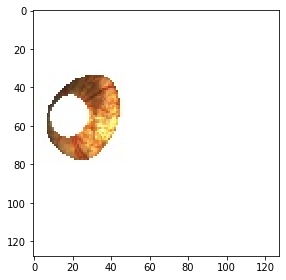

8.656156395102766
P0013


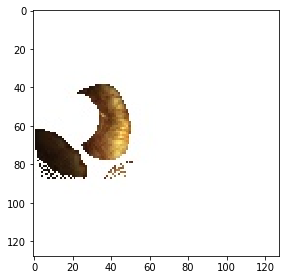

10.229461899455895
P0014


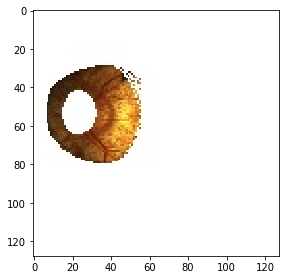

12.746551160854917
P0015


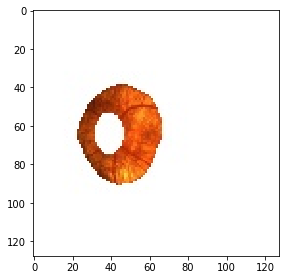

12.540882777650985
P0016


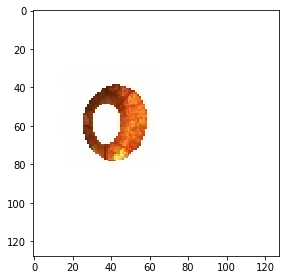

8.079731790465834
P0017


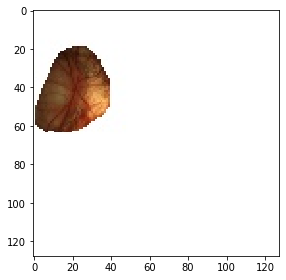

8.929544292972146
P0018


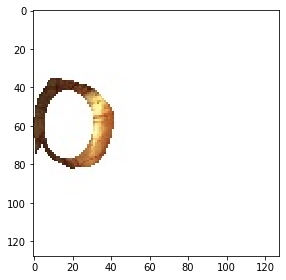

8.775724152816498
P0019


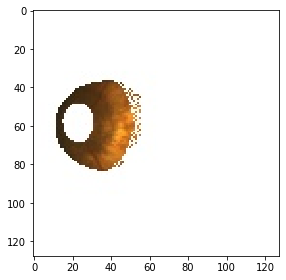

10.620714543874804
P0020


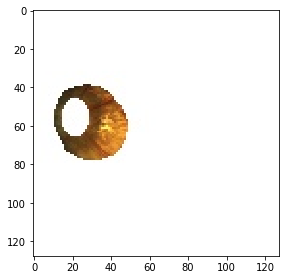

8.389892788600035
P0021


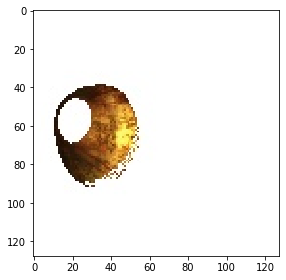

11.6409893648566
P0022


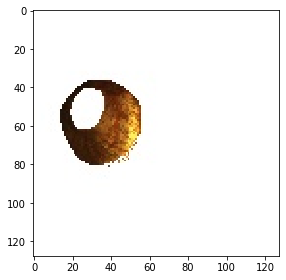

9.82018765992504
P0023


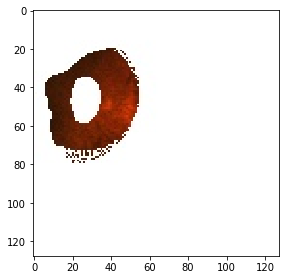

12.130818544383105
P0024


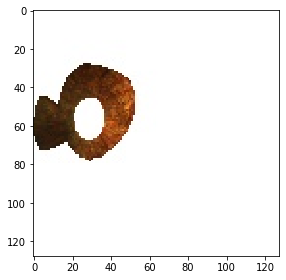

11.861934060465394
P0025


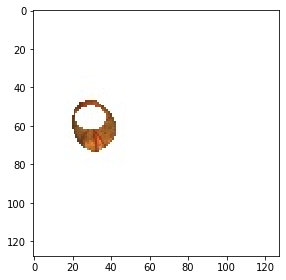

4.689648019362004
P0026


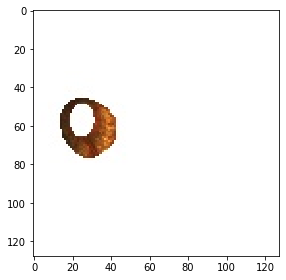

5.773273578732438
P0027


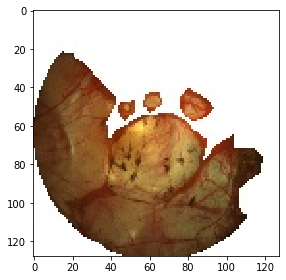

40.13978669118148
P0028


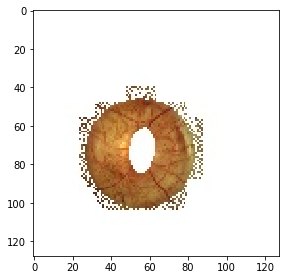

18.533610451778358
P0029


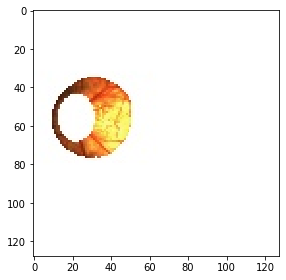

9.972401832527884
P0030


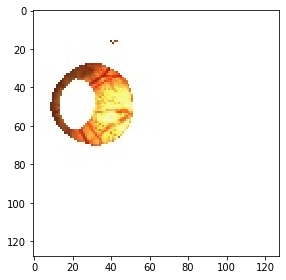

10.51396565359795
P0031


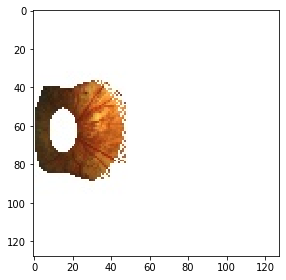

12.19405573167705
P0032


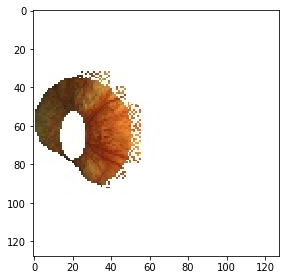

13.57614682965401
P0033


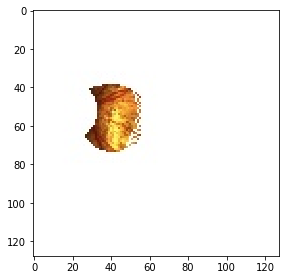

7.430291815827682
P0034


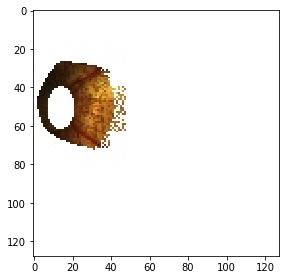

10.389218163274979
P0035


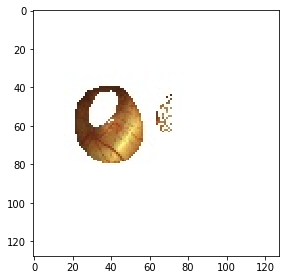

9.420946320073975
P0036


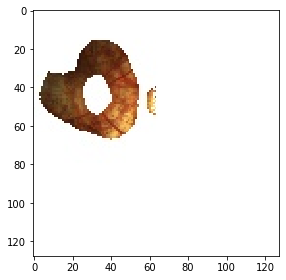

12.460997173652846
P0037


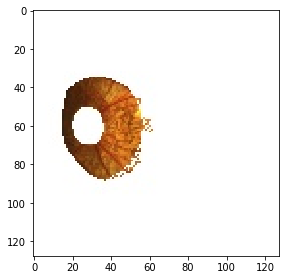

12.294887425280951
P0038


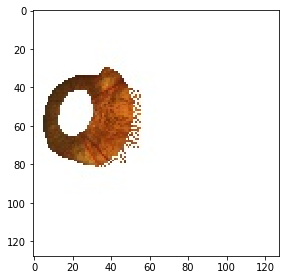

13.020557427200497
P0039


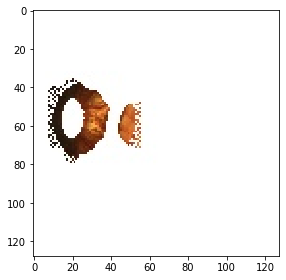

8.878403397197875
P0040


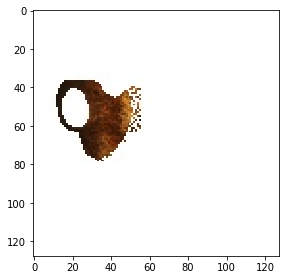

8.547655882152409
P0041


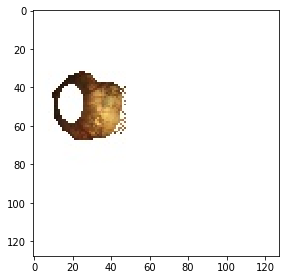

7.376208671478322
P0042


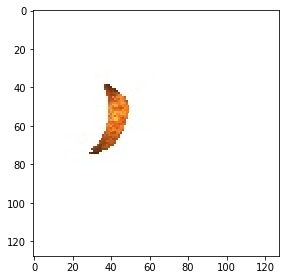

4.722696901634778
P0043


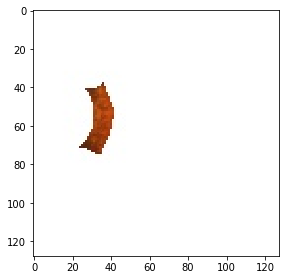

4.8522017757971625
P0044


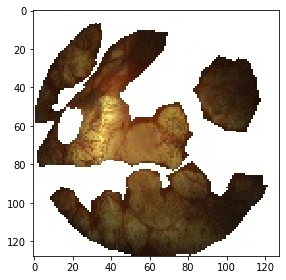

42.64557579155326
P0045


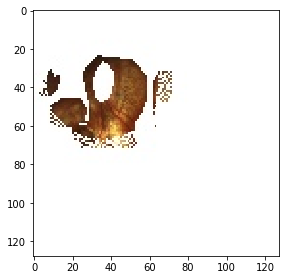

13.173078348194913
P0046


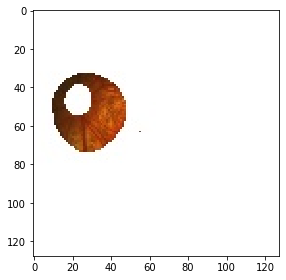

8.77556343589545
P0047


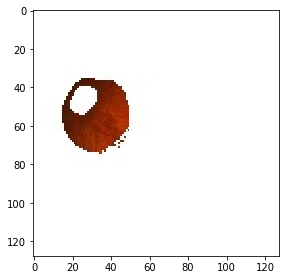

7.889331613595114
P0048


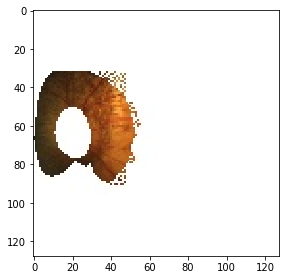

14.021086490851584
P0049


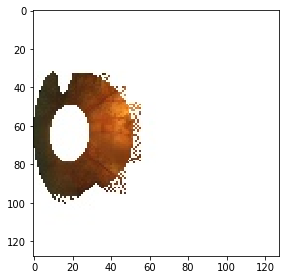

15.094342627604728
P0050


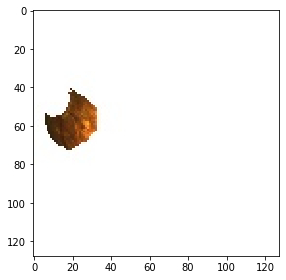

5.203186171202708
P0051


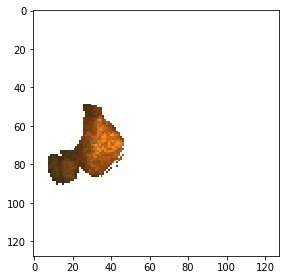

7.253325367645415
P0052


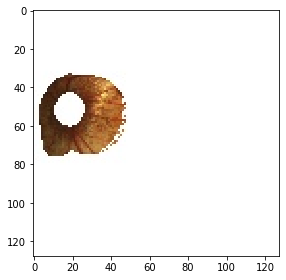

9.750437668709473
P0053


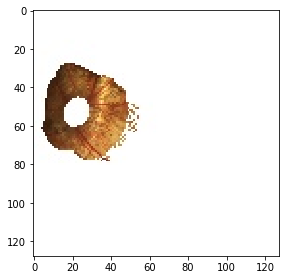

11.880487810061506
P0054


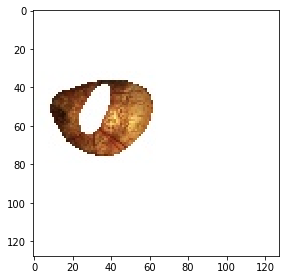

10.780715902788785
P0055


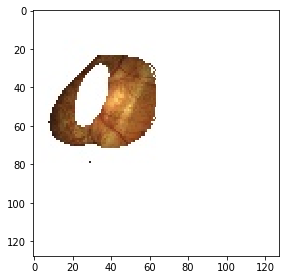

12.981769376506838
P0056


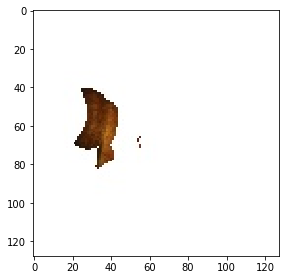

5.97695883008671
P0057


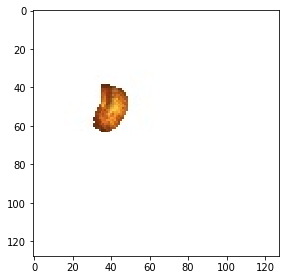

3.9237626963795575
P0058


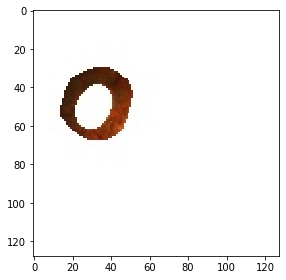

8.48692098999014
P0059


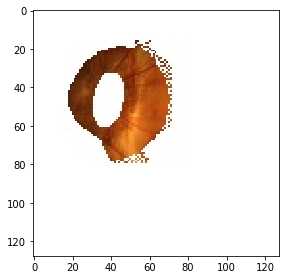

14.939519956422016
P0060


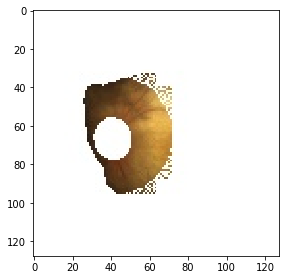

13.55769760727497
P0061


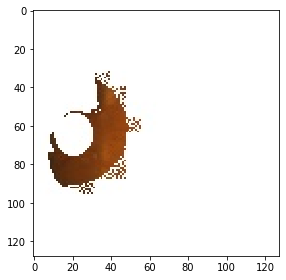

9.60835337479877
P0062


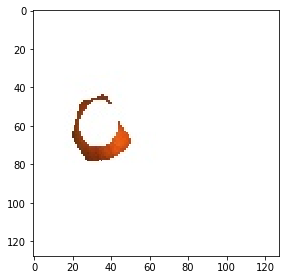

5.670851726829852
P0063


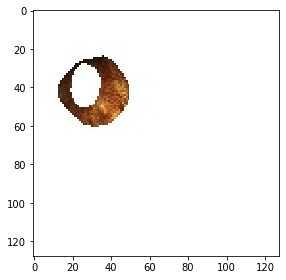

7.327035103721142
P0064


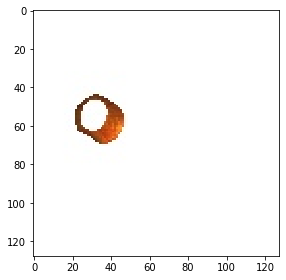

4.821730271202534
P0065


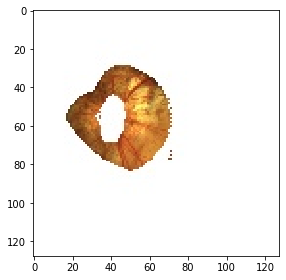

14.196819963704304
P0066


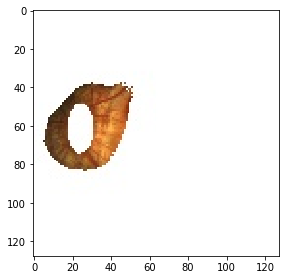

11.043291898090601
P0067


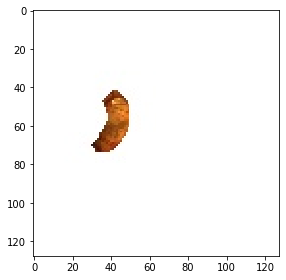

4.47319047989457
P0068


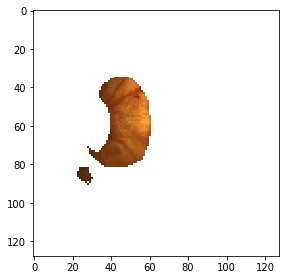

8.997114608759272
P0069


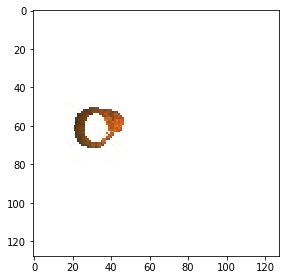

3.8518444583157407
P0071


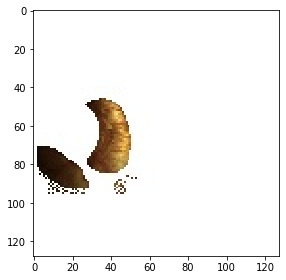

9.83211351654105
P0072


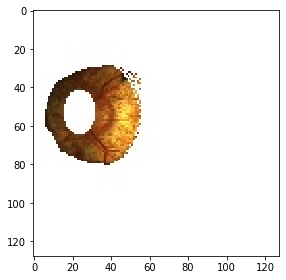

13.25709268762876
P0073


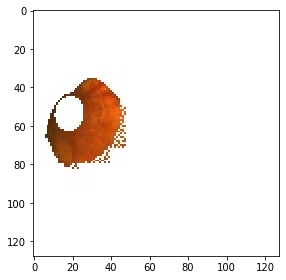

9.10947097824109
P0074


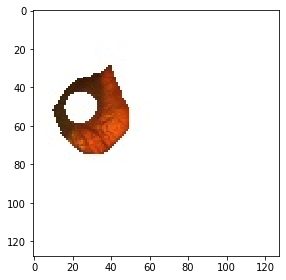

9.30750677640179
P0075


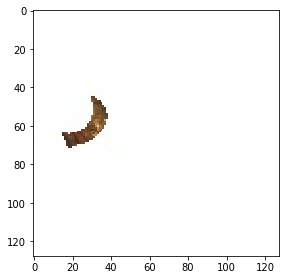

4.251300079489924
P0077


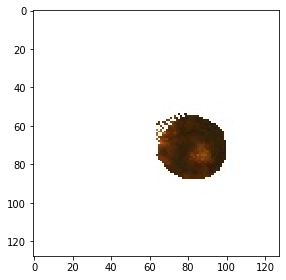

6.965755158353968
P0079


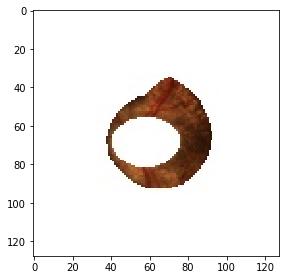

12.646679800223788
P0080


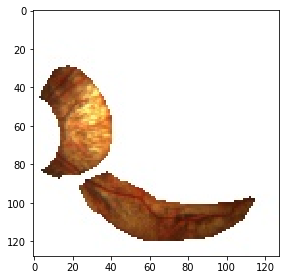

22.242416077195806
P0081


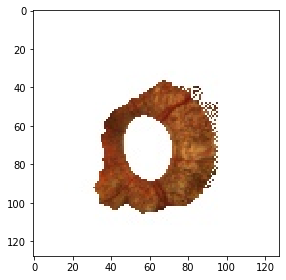

18.257608273822747
P0082


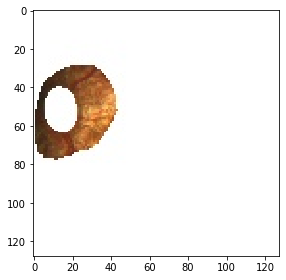

10.556265043255397
P0083


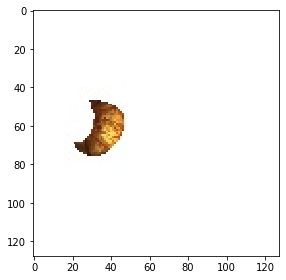

4.68879440659275
P0084


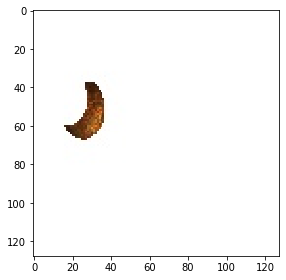

4.251765451195694
P0085


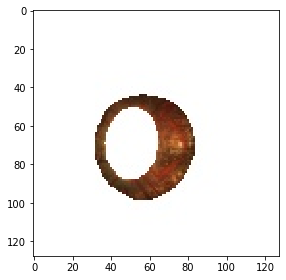

12.567531454967057
P0086


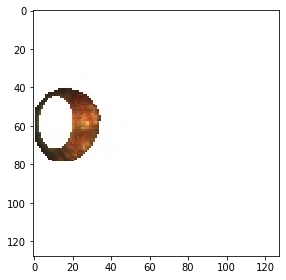

6.591036223330807
P0087


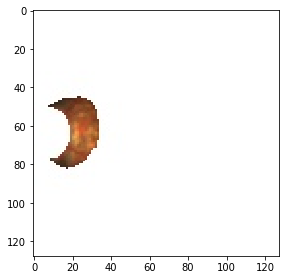

6.447552795229514
P0088


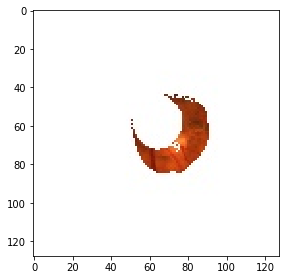

8.637770878549958
P0089


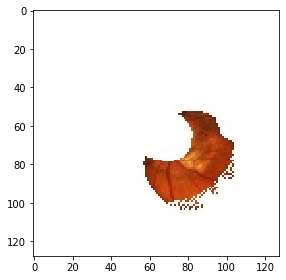

10.967567523463973
P0090


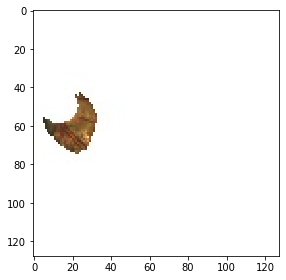

4.941210965048603
P0091


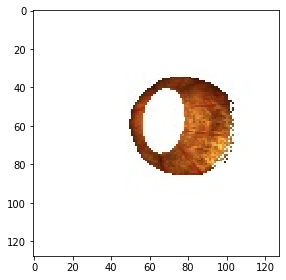

13.442937921870836
P0092


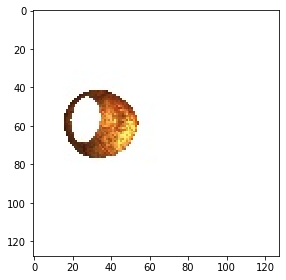

7.4910283261828585
P0093


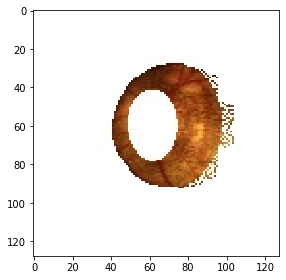

17.385559699775264
P0094


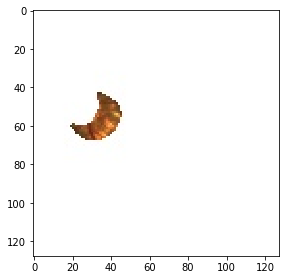

4.308274833905356
P0095


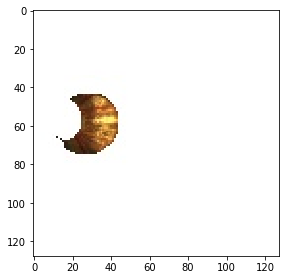

5.814436198598983
P0096


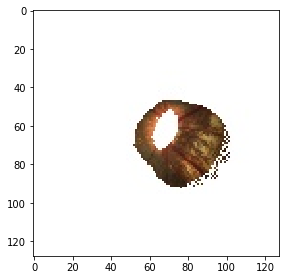

11.07462471164718
P0097


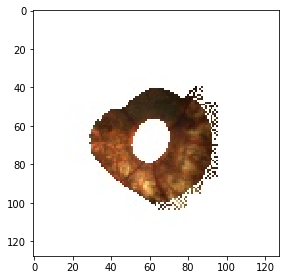

17.68630545187213
P0098


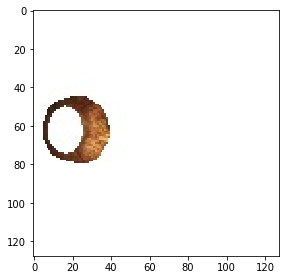

6.58352533007754
P0099


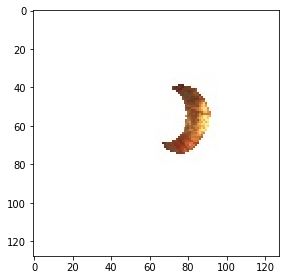

5.311303806101503
P0100


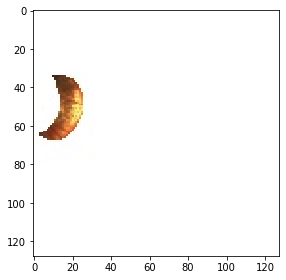

5.011734073812735
P0101


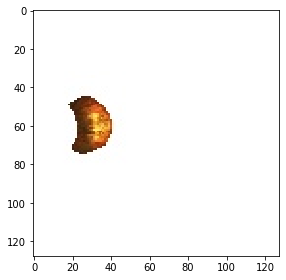

4.974818300915317
P0102


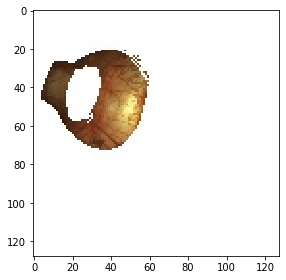

13.206147954328117
P0103


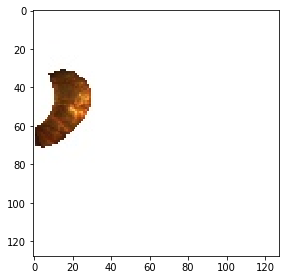

5.924118310827785
P0104


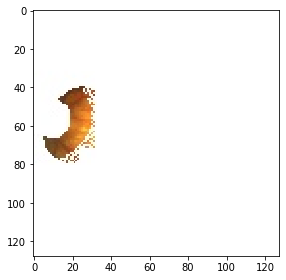

5.375112744677285
P0105


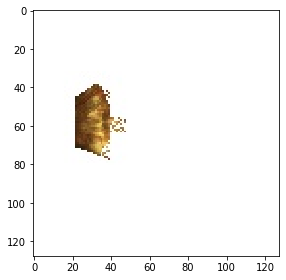

5.823070649434712
P0106


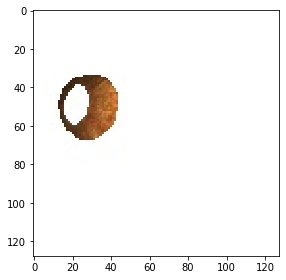

6.6089148379610165
P0107


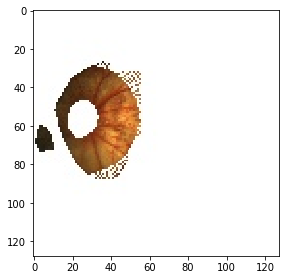

14.0213363681682
P0108


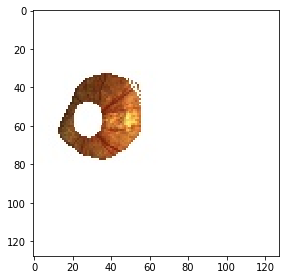

9.95662104651367
P0109


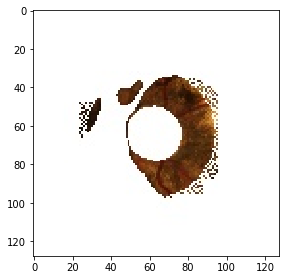

15.139937369172038
P0110


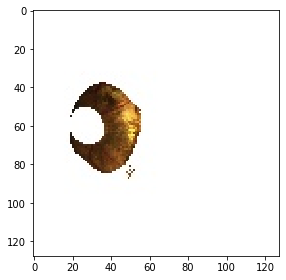

9.36987213401503
P0111


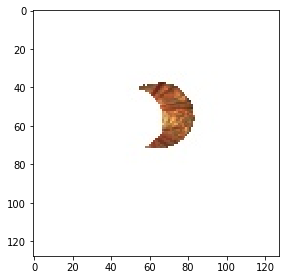

5.965603595579154
P0112


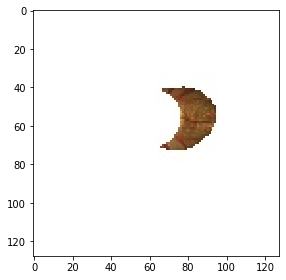

5.444545061760991
P0113


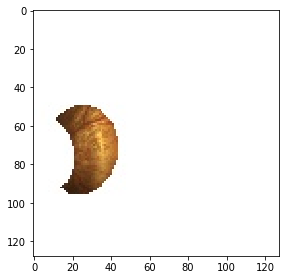

7.694903942144661
P0114


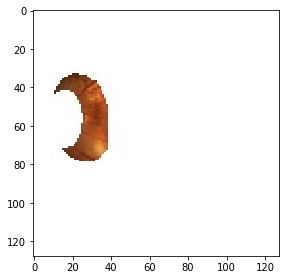

6.761128126055421
P0115


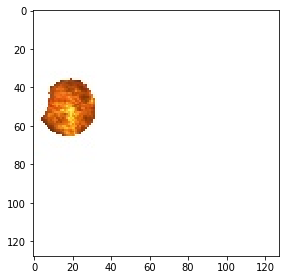

5.7213638688609265
P0116


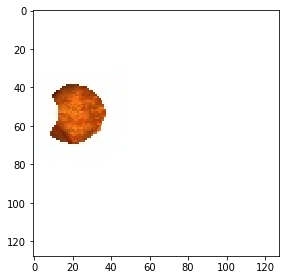

6.9287891842759315
P0117


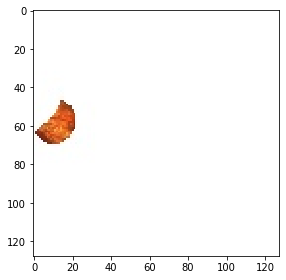

3.9611367207489274
P0118


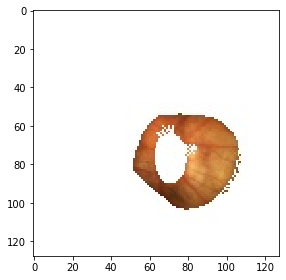

13.243404772997636
P0119


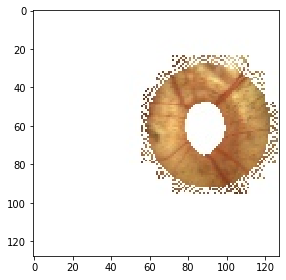

21.91819694493983
P0120


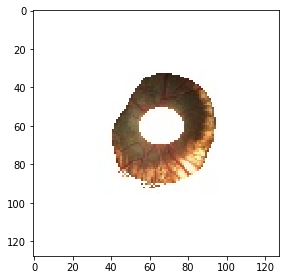

14.623032434980896
P0121


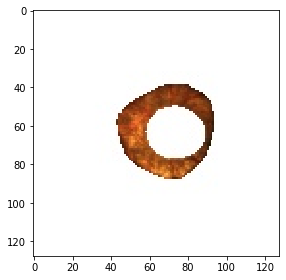

11.675961959940327
P0122


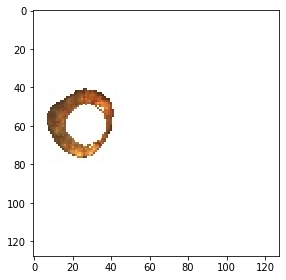

6.900077036441567
P0123


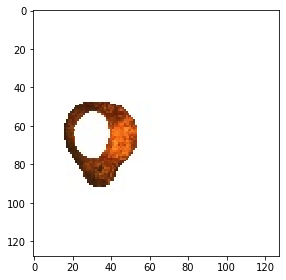

7.997430172456315
P0124


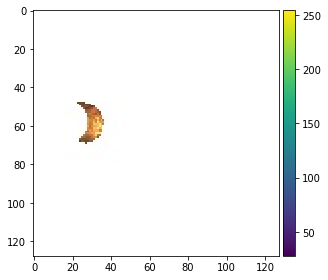

3.127606663199918
P0125


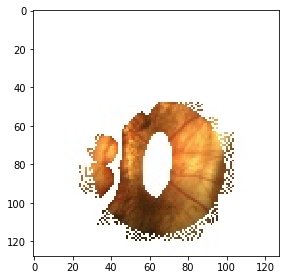

23.024195849137637
P0126


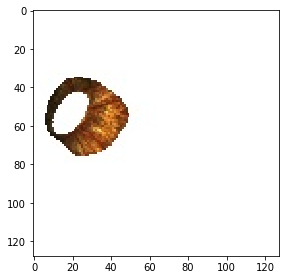

8.854848391698852
P0127


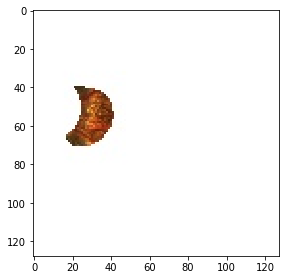

5.268483425851823
P0128


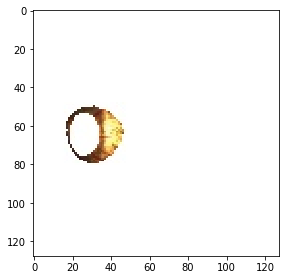

4.351526686241075
P0129


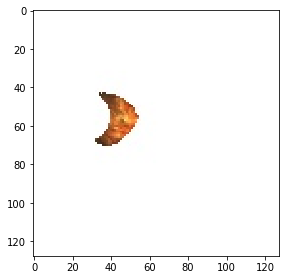

4.350727273210321
P0130


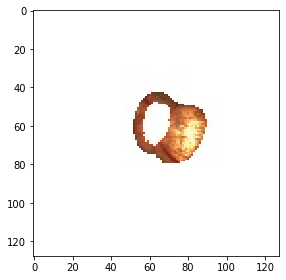

7.6369975072600145
P0131


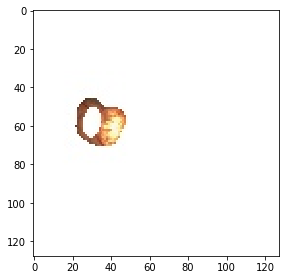

4.903701067171312
P0132


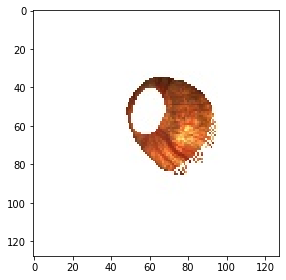

10.756670774656964
P0133


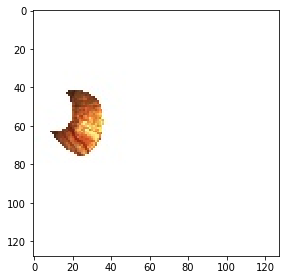

6.201524121684622
P0134


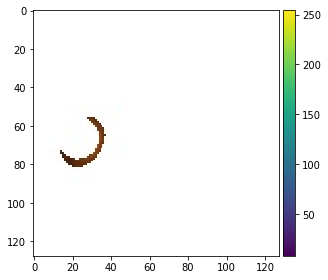

3.708101435585034
P0135


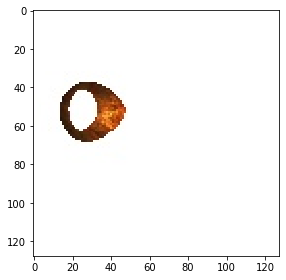

6.337937334004852
P0136


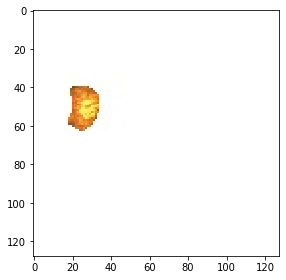

3.6256792715151542
P0137


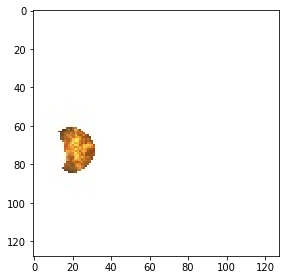

4.200026743794147
P0138


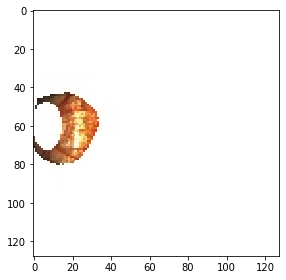

6.968543836506408
P0139


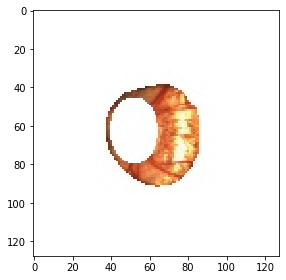

12.887328136668142
P0140


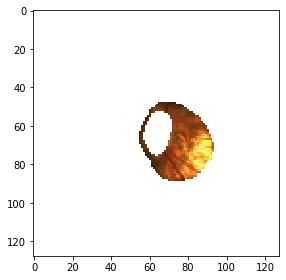

8.418879135916677
P0141


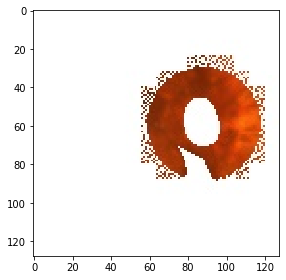

17.987392915578003
P0142


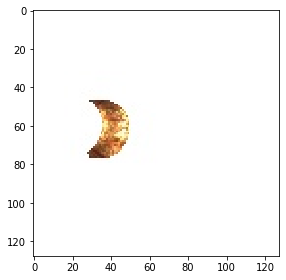

5.238278144531611
P0143


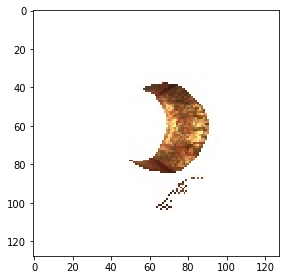

10.086993548698906
P0144


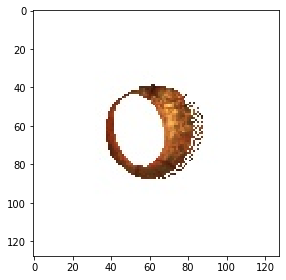

11.239902720891914
P0145


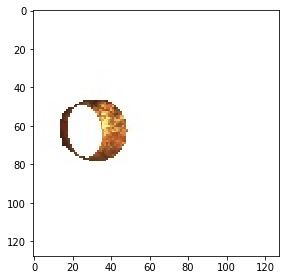

6.525132765654764
P0146


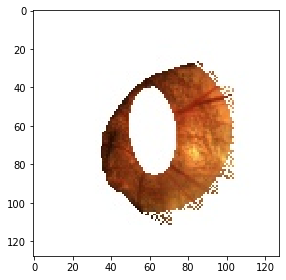

22.439970079189475
P0147


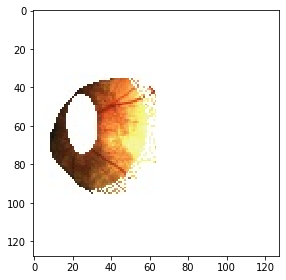

14.829509361241394
P0148


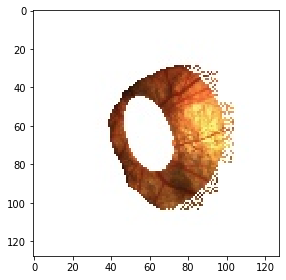

20.557832140856533
P0149


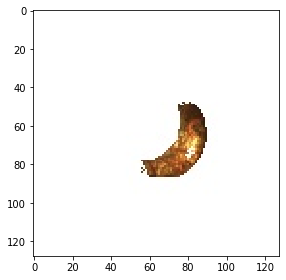

6.4805814746532695
P0150


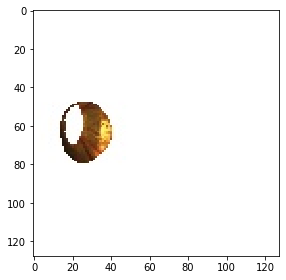

5.427853420917208
P0151


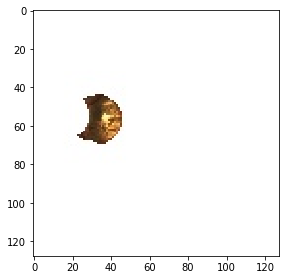

4.673501296212718
P0152


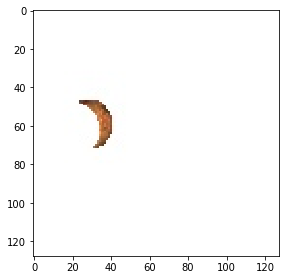

3.757117675817894
P0153


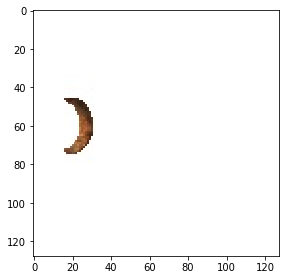

2.9201683550175526
P0154


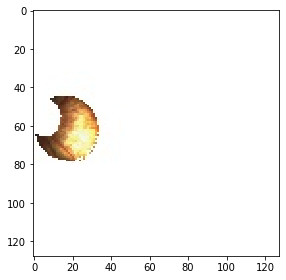

6.390348606224729
P0155


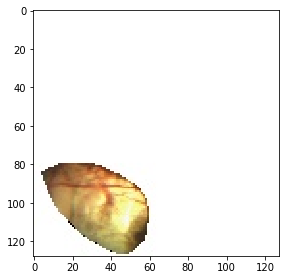

11.773018099825055
P0156


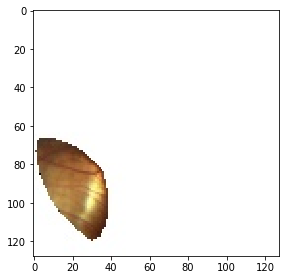

9.326746608723784
P0157


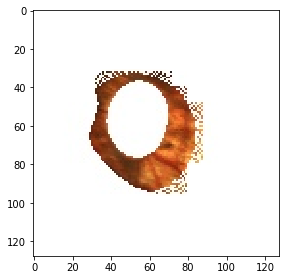

14.638699467841398
P0158


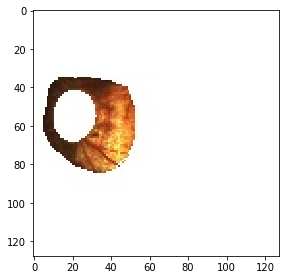

12.387814270055589
P0159


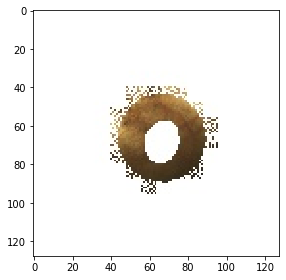

12.310423671242994
P0160


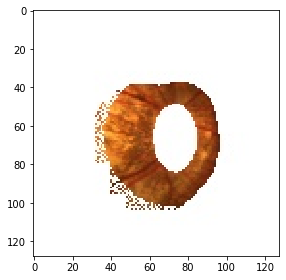

19.09096036608355
P0161


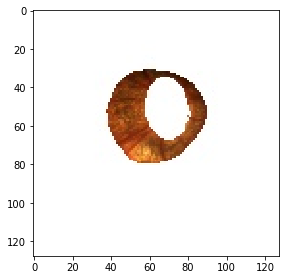

11.518643686351378
P0162


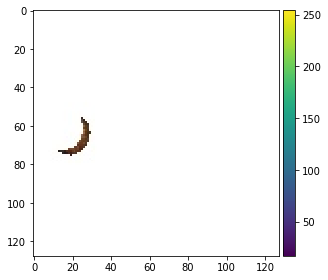

2.0228696150638976
P0163


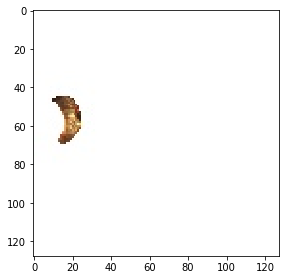

3.5947715314087167
P0164


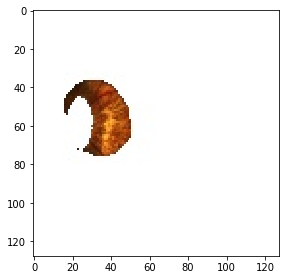

7.559985336304406
P0165


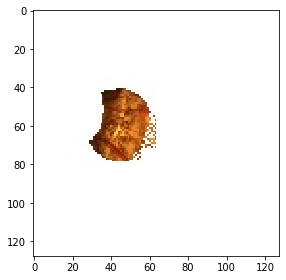

7.334517470677904
P0166


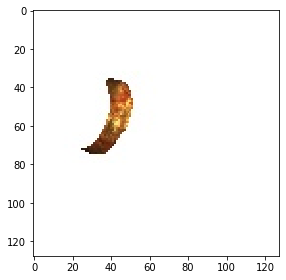

5.247085419671352
P0167


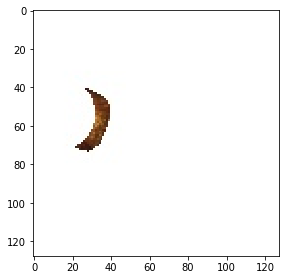

4.103663913249894
P0168


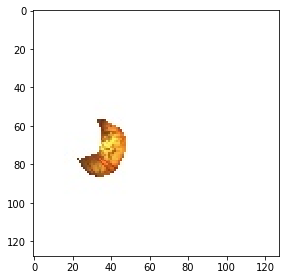

4.607349198954876
P0169


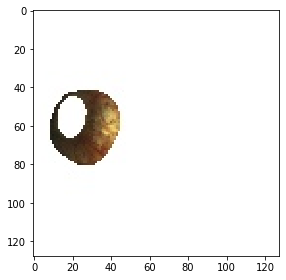

7.742773712339979
P0170


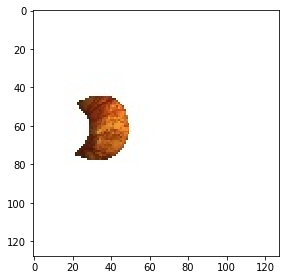

6.679423812826055
P0171


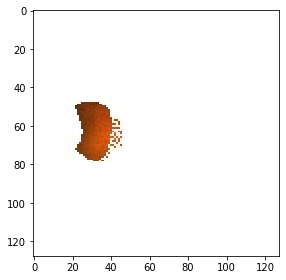

4.501554273276115
P0172


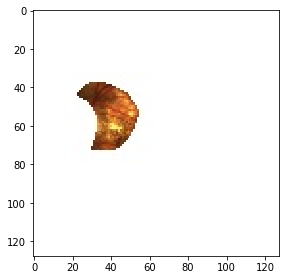

7.291583209763561
P0173


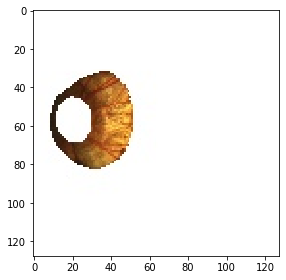

11.386955206014395
P0174


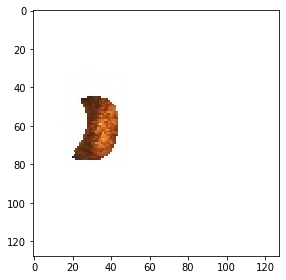

5.40331640238597
P0175


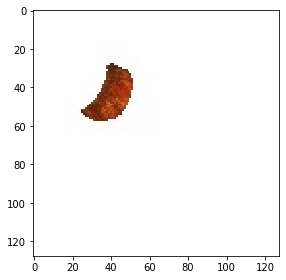

5.463914684641468
P0176


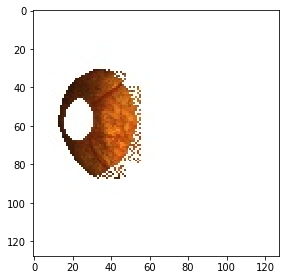

12.463448979603426
P0177


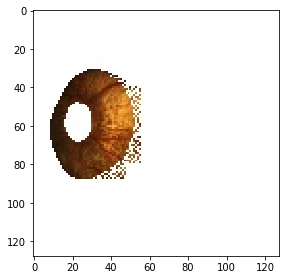

13.649817246202506
P0178


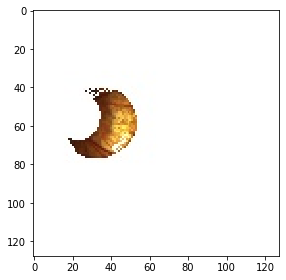

6.796150405355844
P0179


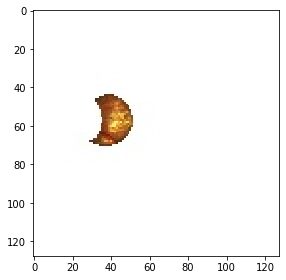

4.770430936048797
P0180


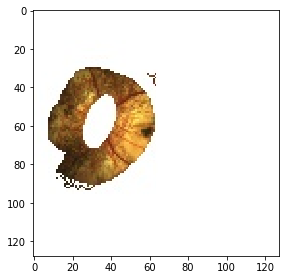

16.200985614825466
P0181


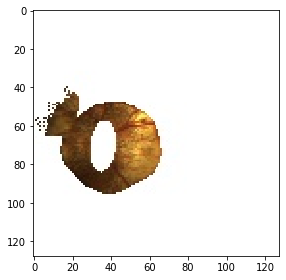

13.82179460537241
P0182


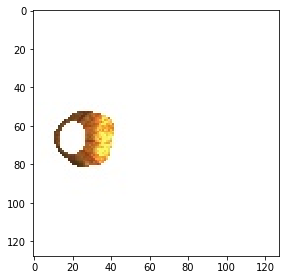

6.422262676296462
P0183


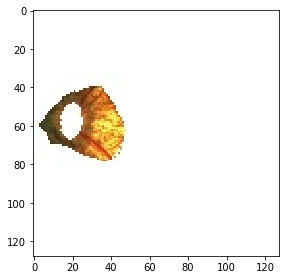

8.509805702103847
P0184


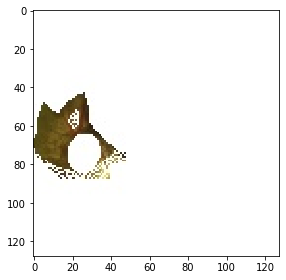

8.277819661342559
P0185


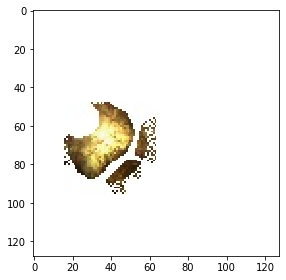

9.096382092696654
P0186


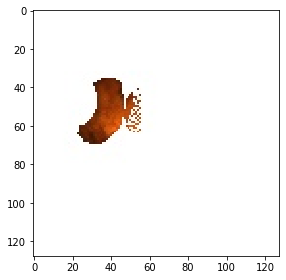

6.683607929968914
P0187


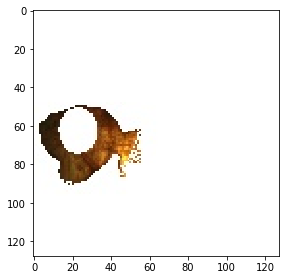

9.59879275746808
P0188


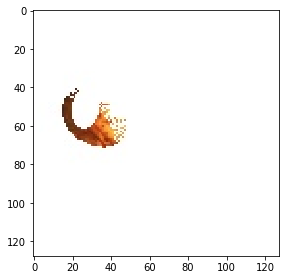

5.19300226111962
P0189


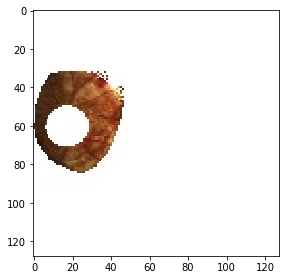

11.227752066278388
P0190


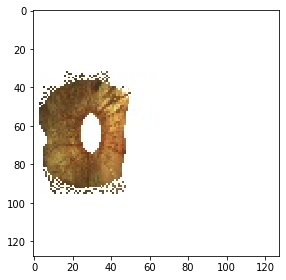

14.62098822798104
P0191


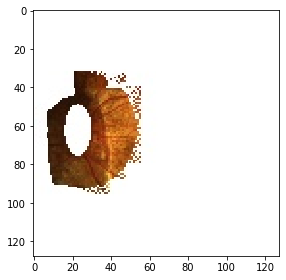

14.5535081738545
P0192


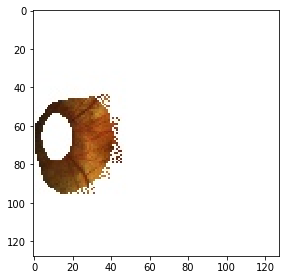

10.97632429929698
P0193


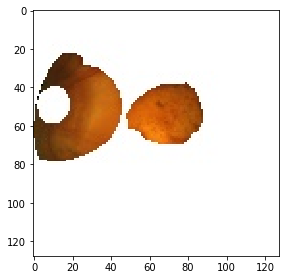

17.8330019750155
P0194


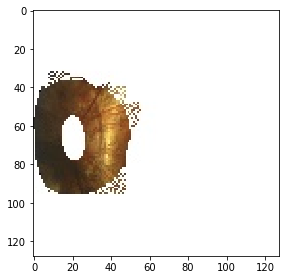

14.552558835120328
P0195


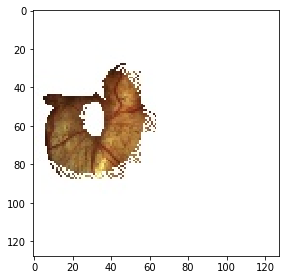

14.725904729257584
P0196


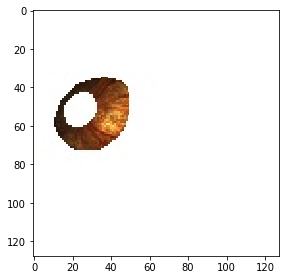

8.658842087310074
P0197


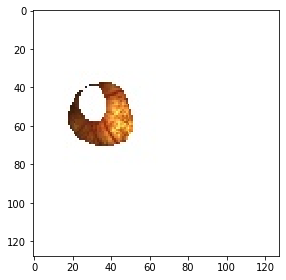

7.3857514847479315
P0198


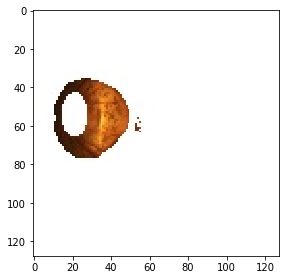

8.756837448604033
P0199


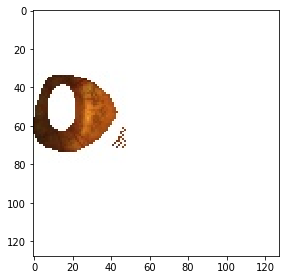

8.915303638151673
P0200


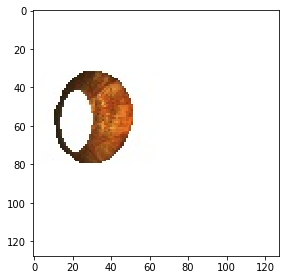

10.027966080876624
P0201


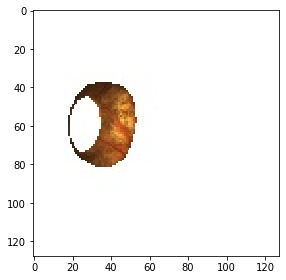

8.816302871348242
P0202


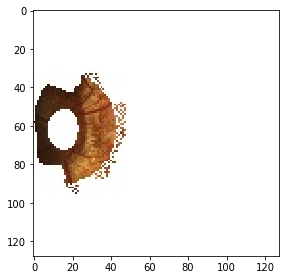

12.190410540644217
P0203


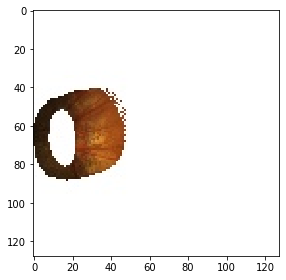

10.975461459084205
P0204


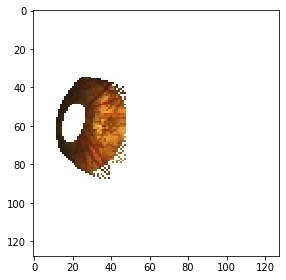

9.777517612210968
P0205


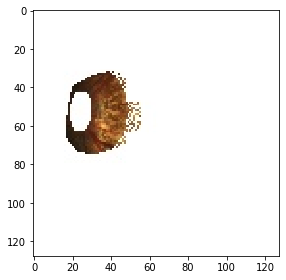

7.854826719462453
P0206


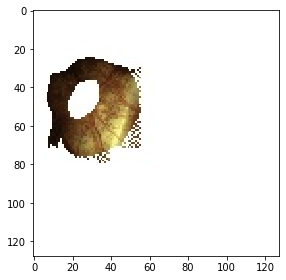

12.993183571023044
P0207


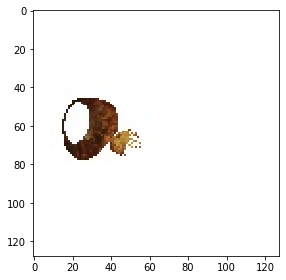

7.158193513105621
P0208


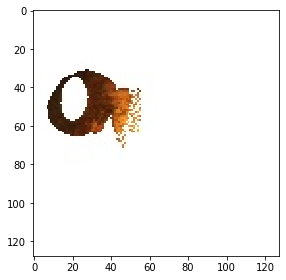

8.996400701517508
P0209


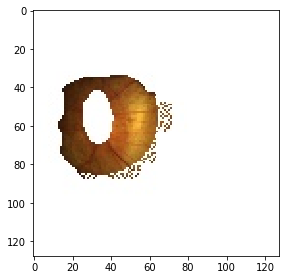

14.41678576163213
P0210


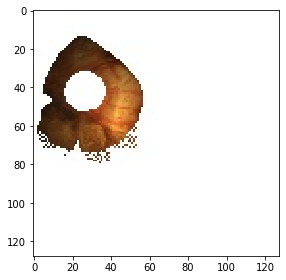

15.132639639558995
P0211


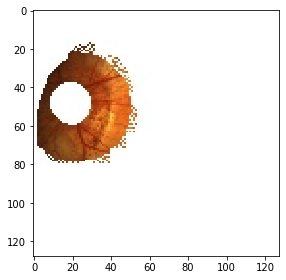

14.040083906011729
P0212


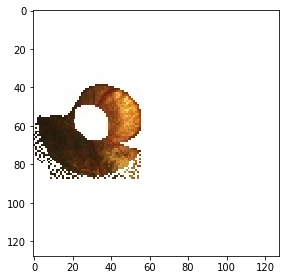

13.085959532834249
P0213


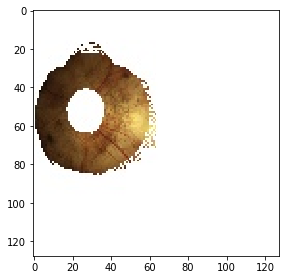

17.69323048159782


In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
path = 'PPA_images'
entr=[]
countpix=[]
count=1
labels=[]
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
for filename in train_ids:
    mId = filename.split('.')[0]
    print(mId)
    img =imread('PPA_images/'+mId+'.jpg')
    #img=cv2.resize(img,(128,128))
    imshow(img)
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if count < 18:
        namee = 'HighlyMyopic'
        labels.append(namee)
    elif count < 102:
        namee = 'Normal'
        labels.append(namee)
    elif count < 312:
        namee = 'PathologicallyMyopic'
        labels.append(namee)
    count=count+1
    glcm = np.squeeze(greycomatrix(img, distances=[1], 
                            angles=[0,45,90,135,180], symmetric=True, normed=True))
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    # yields 10.704625483788325
    print(entropy)
    entropy=truncate(entropy,5)
    entr.append(entropy)


    #bright_count = np.sum(np.array(img) < 255)
    #print(bright_count)
    #countpix.append(bright_count)
    
f = open("PosteriorStaphyloma.csv", "w")
#f.write("{},{},{}\n".format("Entropy","Pix_Count","class"))
for x in zip(entr,labels):
    f.write("{},{}\n".format(x[0], x[1]))
cv2.waitKey()
cv2.destroyAllWindows()